# NumPy arrays

* a list of numbers will create a 1D array 
* a list of lists will create 2D array
* Further nested list will create higher-dimensional arrays.

In [32]:
import numpy as np

### 1.Converting Python sequences to NumPy arrays

In [33]:
a1D=np.array([1,2,3,4])
a2D=np.array([[1,2],[3,4]])
a3D=np.array([[[1,2],[3,4]],[[5,6],[7,8]]])
a1D


array([1, 2, 3, 4])

In [34]:
a2D


array([[1, 2],
       [3, 4]])

In [41]:
a3D


array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])

### 2.Intrinsic NumPy array creation functions

#### 1D Array Creation


In [18]:
list(range(1,10))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [19]:
list(range(1,10,2.1))

TypeError: 'float' object cannot be interpreted as an integer

In [11]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
np.arange(2,10 , dtype=float)

array([2., 3., 4., 5., 6., 7., 8., 9.])

In [13]:
#best practice for numpy.arange is to use integer start, end, and step values

np.arange(2,3,0.1)

array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9])

In [20]:
"""The advantage of this creation function is that 
you guarantee the number of elements and the starting and end point"""
np.linspace(1.,4.,50)

array([1.        , 1.06122449, 1.12244898, 1.18367347, 1.24489796,
       1.30612245, 1.36734694, 1.42857143, 1.48979592, 1.55102041,
       1.6122449 , 1.67346939, 1.73469388, 1.79591837, 1.85714286,
       1.91836735, 1.97959184, 2.04081633, 2.10204082, 2.16326531,
       2.2244898 , 2.28571429, 2.34693878, 2.40816327, 2.46938776,
       2.53061224, 2.59183673, 2.65306122, 2.71428571, 2.7755102 ,
       2.83673469, 2.89795918, 2.95918367, 3.02040816, 3.08163265,
       3.14285714, 3.20408163, 3.26530612, 3.32653061, 3.3877551 ,
       3.44897959, 3.51020408, 3.57142857, 3.63265306, 3.69387755,
       3.75510204, 3.81632653, 3.87755102, 3.93877551, 4.        ])

In [24]:
np.linspace(1.,4.,50,endpoint=False)

array([1.  , 1.06, 1.12, 1.18, 1.24, 1.3 , 1.36, 1.42, 1.48, 1.54, 1.6 ,
       1.66, 1.72, 1.78, 1.84, 1.9 , 1.96, 2.02, 2.08, 2.14, 2.2 , 2.26,
       2.32, 2.38, 2.44, 2.5 , 2.56, 2.62, 2.68, 2.74, 2.8 , 2.86, 2.92,
       2.98, 3.04, 3.1 , 3.16, 3.22, 3.28, 3.34, 3.4 , 3.46, 3.52, 3.58,
       3.64, 3.7 , 3.76, 3.82, 3.88, 3.94])

#### 2D array creation

**(numpy.eye, numpy.diag, numpy.vander)**

In [6]:
# np.eye(n,m)- defines a 2D identity matrix.

np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [5]:
np.eye(3,5,dtype=int)

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0]])

In [7]:
#define either a square 2D array with given values along the diagonal

np.diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [13]:
np.diag([1,2,3],1)

array([[0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3],
       [0, 0, 0, 0]])

In [20]:
#if given a 2D array returns a 1D array that is only the diagonal elements

print(a2D)
print("diagonal element of above array",np.diag(a2D))

[[1 2]
 [3 4]]
diagonal element of above array [1 4]


In [23]:
np.vander(np.linspace(0,2,5),3)

array([[0.  , 0.  , 1.  ],
       [0.25, 0.5 , 1.  ],
       [1.  , 1.  , 1.  ],
       [2.25, 1.5 , 1.  ],
       [4.  , 2.  , 1.  ]])

Vandermonde matrix:
 [[ 0  0  0  1]
 [ 1  1  1  1]
 [ 8  4  2  1]
 [27  9  3  1]]
Polynomial coefficients: [ 1.  -4.5  5.5  1. ]


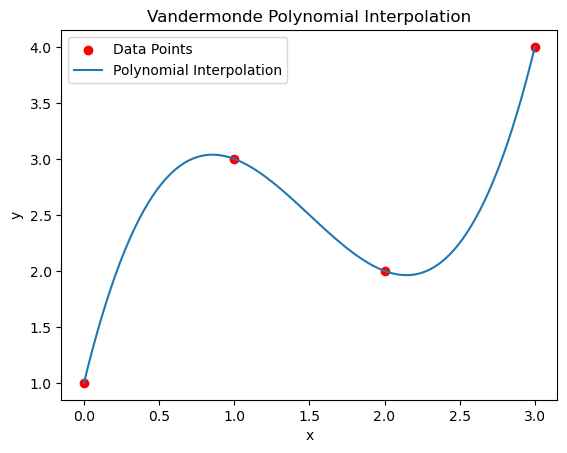

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Given data points (x, y)
x = np.array([0, 1, 2, 3])
y = np.array([1, 3, 2, 4])


# Construct the Vandermonde matrix
V = np.vander(x)
print("Vandermonde matrix:\n", V)


# Solve the linear system V * a = y to find coefficients a
coefficients = np.linalg.solve(V, y)
print("Polynomial coefficients:", coefficients)


# Define the polynomial function using the coefficients
def polynomial(x, coeffs):
    n = len(coeffs)
    return sum(coeffs[i] * x**(n-i-1) for i in range(n))

# Generate x values for plotting
x_plot = np.linspace(min(x), max(x), 100)
y_plot = polynomial(x_plot, coefficients)

# Plot the original data points and the polynomial interpolation
plt.scatter(x, y, color='red', label='Data Points')
plt.plot(x_plot, y_plot, label='Polynomial Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Vandermonde Polynomial Interpolation')
plt.show()

### 3 - General ndarray creation functions

In [2]:
#np.zeros will create an array filled with 0 values with the specified shape

np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [3]:
np.zeros((2, 3, 2))

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]]])

In [4]:
#np.ones will create an array filled with 1 values.

np.ones((2,3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [5]:
np.ones((3,2,3))

array([[[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]]])

In [4]:
from numpy.random import default_rng

In [5]:
#will create an array filled with random values between 0 and 1

default_rng(9).random((2,3))

array([[0.8702492 , 0.28681721, 0.60314815],
       [0.77753408, 0.71607463, 0.91538012]])

In [9]:
#to generate a matrix of random integers within a specific range.

random_matrix=np.random.randint(10,20, size=(3,2))
random_matrix

array([[18, 13],
       [16, 10],
       [10, 12]])

In [11]:
"""numpy.indices will create a set of arrays (stacked as a one-higher dimensioned array)
one per dimension with each representing variation in that dimension"""

np.indices((3,3,2))


array([[[[0, 0],
         [0, 0],
         [0, 0]],

        [[1, 1],
         [1, 1],
         [1, 1]],

        [[2, 2],
         [2, 2],
         [2, 2]]],


       [[[0, 0],
         [1, 1],
         [2, 2]],

        [[0, 0],
         [1, 1],
         [2, 2]],

        [[0, 0],
         [1, 1],
         [2, 2]]],


       [[[0, 1],
         [0, 1],
         [0, 1]],

        [[0, 1],
         [0, 1],
         [0, 1]],

        [[0, 1],
         [0, 1],
         [0, 1]]]])

### numpy.asarray


In [11]:
A=([1,2],[3,4])
np.asarray(A)

array([[1, 2],
       [3, 4]])

### numpy.asanyarray

In [15]:
A_mat=np.mat(A)
A_mat


matrix([[1, 2],
        [3, 4]])

In [16]:

np.asanyarray(A_mat)

matrix([[1, 2],
        [3, 4]])

In [17]:
np.asarray(A_mat)

array([[1, 2],
       [3, 4]])

### 3. Replicating, joining or mutating existing arrays

In [2]:
import numpy as np
#numpy.copy


a=np.array([1,2,3,4])
b=a[:3].copy()
b +=1
print('a=',a, 'b=',b)


a= [1 2 3 4] b= [2 3 4]


In [3]:
a=np.array([1,2,3,4])
print(a)

[1 2 3 4]


In [44]:
c=np.copy(b)

In [45]:
b[0]=100
print('a=',a, 'b=',b,'c=',c)

a= [1 2 3 4] b= [100   3   4] c= [2 3 4]


### numpy.fromfunction

In [46]:
#Construct an array by executing a function over eacg coordinate


In [47]:
np.fromfunction(lambda i, j: i==j,(3,3),dtype=int)

array([[ True, False, False],
       [False,  True, False],
       [False, False,  True]])

In [48]:
np.fromfunction(lambda i,j,k: i*j*k, (3,3,3),dtype=int)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 1, 2],
        [0, 2, 4]],

       [[0, 0, 0],
        [0, 2, 4],
        [0, 4, 8]]])

*Creating a new 1-D array from iterable object*

In [51]:
iterable=(x*5 for x in range(1,11))
print(iterable)

<generator object <genexpr> at 0x000001DEAC44CA00>


In [52]:
np.fromiter(iterable,int)

array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

*Creating array from text data in a string*

In [30]:
numbr='1 1 2 3 4 5 66 65'
strray=np.fromstring(numbr,dtype=int,sep=' ')
strray

array([ 1,  1,  2,  3,  4,  5, 66, 65])

*Creating a record array from a list of arrays*

In [57]:
x1=np.array([1,2,3,4])
x2=np.array(["a",'bb',"ccc",'dddd'])

x3=np.array([1.1,2,3,4])
x4=np.array([1.1,2,3,4])

In [58]:
type(x2)

numpy.ndarray

In [59]:
rec=np.core.records.fromarrays([x1,x2,x3,x4])
rec

rec.array([(1, 'a', 1.1, 1.1), (2, 'bb', 2. , 2. ), (3, 'ccc', 3. , 3. ),
           (4, 'dddd', 4. , 4. )],
          dtype=[('f0', '<i4'), ('f1', '<U4'), ('f2', '<f8'), ('f3', '<f8')])

In [65]:
print(rec[1])
print(rec[1]['f3'])

(2, 'bb', 2., 2.)
2.0


### Data Types

In [7]:
my_list=[1,2,3]
import numpy as np
arr=np.array(my_list)
print("Type of this object: ",type(arr))
print("Here is the vector \n--------------\n",arr)

Type of this object:  <class 'numpy.ndarray'>
Here is the vector 
--------------
 [1 2 3]


In [17]:
my_mat=[[1.1,1.2,1.3],[2.1,2.2,2.3],[3.1,3.2,3.3]]
mat=np.array(my_mat)
print("Type of this object: ",type(mat))
print("Here is the matrix :\n--------------\n",mat,"\n--------------\n")
print("Dimension of this matrix : ",mat.ndim, sep=' ') #ndim gives the dimension
print("Size of this matrix : ",mat.size,sep=' ') #size gives the total no. of elements
print("Shape of this matrix : ",mat.shape, sep=' ') #shape gives the no. of elements along each axes
print("Data Type of this matrix : ",mat.dtype, sep=' ') #dtype givees the data type contained in the array



Type of this object:  <class 'numpy.ndarray'>
Here is the matrix :
--------------
 [[1.1 1.2 1.3]
 [2.1 2.2 2.3]
 [3.1 3.2 3.3]] 
--------------

Dimension of this matrix : , 2
Size of this matrix :  9
Shape of this matrix :  (3, 3)
Data Type of this matrix :  float64


### Revision

In [31]:
x=np.zeros((3,4,8),dtype=int)+5*2
x

array([[[10, 10, 10, 10, 10, 10, 10, 10],
        [10, 10, 10, 10, 10, 10, 10, 10],
        [10, 10, 10, 10, 10, 10, 10, 10],
        [10, 10, 10, 10, 10, 10, 10, 10]],

       [[10, 10, 10, 10, 10, 10, 10, 10],
        [10, 10, 10, 10, 10, 10, 10, 10],
        [10, 10, 10, 10, 10, 10, 10, 10],
        [10, 10, 10, 10, 10, 10, 10, 10]],

       [[10, 10, 10, 10, 10, 10, 10, 10],
        [10, 10, 10, 10, 10, 10, 10, 10],
        [10, 10, 10, 10, 10, 10, 10, 10],
        [10, 10, 10, 10, 10, 10, 10, 10]]])

In [33]:
 y=np.linspace(4,8,80)
y

array([4.        , 4.05063291, 4.10126582, 4.15189873, 4.20253165,
       4.25316456, 4.30379747, 4.35443038, 4.40506329, 4.4556962 ,
       4.50632911, 4.55696203, 4.60759494, 4.65822785, 4.70886076,
       4.75949367, 4.81012658, 4.86075949, 4.91139241, 4.96202532,
       5.01265823, 5.06329114, 5.11392405, 5.16455696, 5.21518987,
       5.26582278, 5.3164557 , 5.36708861, 5.41772152, 5.46835443,
       5.51898734, 5.56962025, 5.62025316, 5.67088608, 5.72151899,
       5.7721519 , 5.82278481, 5.87341772, 5.92405063, 5.97468354,
       6.02531646, 6.07594937, 6.12658228, 6.17721519, 6.2278481 ,
       6.27848101, 6.32911392, 6.37974684, 6.43037975, 6.48101266,
       6.53164557, 6.58227848, 6.63291139, 6.6835443 , 6.73417722,
       6.78481013, 6.83544304, 6.88607595, 6.93670886, 6.98734177,
       7.03797468, 7.08860759, 7.13924051, 7.18987342, 7.24050633,
       7.29113924, 7.34177215, 7.39240506, 7.44303797, 7.49367089,
       7.5443038 , 7.59493671, 7.64556962, 7.69620253, 7.74683

In [34]:
 np.mat(y)

matrix([[4.        , 4.05063291, 4.10126582, 4.15189873, 4.20253165,
         4.25316456, 4.30379747, 4.35443038, 4.40506329, 4.4556962 ,
         4.50632911, 4.55696203, 4.60759494, 4.65822785, 4.70886076,
         4.75949367, 4.81012658, 4.86075949, 4.91139241, 4.96202532,
         5.01265823, 5.06329114, 5.11392405, 5.16455696, 5.21518987,
         5.26582278, 5.3164557 , 5.36708861, 5.41772152, 5.46835443,
         5.51898734, 5.56962025, 5.62025316, 5.67088608, 5.72151899,
         5.7721519 , 5.82278481, 5.87341772, 5.92405063, 5.97468354,
         6.02531646, 6.07594937, 6.12658228, 6.17721519, 6.2278481 ,
         6.27848101, 6.32911392, 6.37974684, 6.43037975, 6.48101266,
         6.53164557, 6.58227848, 6.63291139, 6.6835443 , 6.73417722,
         6.78481013, 6.83544304, 6.88607595, 6.93670886, 6.98734177,
         7.03797468, 7.08860759, 7.13924051, 7.18987342, 7.24050633,
         7.29113924, 7.34177215, 7.39240506, 7.44303797, 7.49367089,
         7.5443038 , 7.59493671, 7

In [46]:
z=[[4],[5],[2]]
zarr=np.array(z)
print("dimension",zarr.ndim)
print('shape',zarr.shape)
print('data type',zarr.dtype)

dimension 2
shape (3, 1)
data type int32


  #### numpy.reshape :
  *Gives a new shape to an array without changing its data.*
  

In [9]:
import numpy as np
np.arange(16)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [10]:
np.arange(16).reshape(-1,4)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [11]:
x=np.arange(16).reshape(4,4)
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

#### numpy.diag :
*Extract a diagonal or construct a diagonal array.*

In [12]:
print(np.diag(x,k=-4))

print(np.diag(x,k=-3))

print(np.diag(x,k=-2))

print(np.diag(x,k=-1))

print(np.diag(x,k=0))

print(np.diag(x,k=1))

print(np.diag(x,k=2))

print(np.diag(x,k=3))

print(np.diag(x,k=4))

[]
[12]
[ 8 13]
[ 4  9 14]
[ 0  5 10 15]
[ 1  6 11]
[2 7]
[3]
[]


In [13]:
np.diag(np.diag(x))

array([[ 0,  0,  0,  0],
       [ 0,  5,  0,  0],
       [ 0,  0, 10,  0],
       [ 0,  0,  0, 15]])

#### numpy.diagflat
*Create a 2-D array with the flattened input as a diagonal.*

In [14]:
np.diagflat([[1,2],[3,4]], k=1)

array([[0, 1, 0, 0, 0],
       [0, 0, 2, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 4],
       [0, 0, 0, 0, 0]])

In [15]:
np.diagflat([[1,2],[3,4]],1) #we need not to mention the k

array([[0, 1, 0, 0, 0],
       [0, 0, 2, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 4],
       [0, 0, 0, 0, 0]])

#### numpy.tri and tril / triu
*An array with ones at and below the given diagonal and zeros elsewhere.*

In [16]:
print(np.tri(3,k=0,dtype=int))

[[1 0 0]
 [1 1 0]
 [1 1 1]]


In [17]:
np.tri(5)

array([[1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1.]])

In [18]:
y=np.array([[1,2,3],[4,5,6],[7,8,9]])
y

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [19]:
#return a lower triangle of the array

np.tril(y)

array([[1, 0, 0],
       [4, 5, 0],
       [7, 8, 9]])

In [20]:
#returns the upper triangle of the array

np.triu(y)

array([[1, 2, 3],
       [0, 5, 6],
       [0, 0, 9]])

### Random Number Generations

#### random.rand :
*Random values in a given shape.*

#### random.randn :
*Return a sample (or samples) from the “standard normal” distribution.*

#### random.randint :
*Return random integers from low (inclusive) to high (exclusive).*

In [32]:
np.random.randn(2,3,4)

array([[[ 0.56951442,  0.19265097,  0.94849408, -0.43471586],
        [-1.20117601,  0.44135993, -0.32370762, -0.27135399],
        [-1.22586146,  0.25658716, -0.79565803,  0.51803828]],

       [[-4.21684889, -0.16554812, -0.26547557,  1.12024563],
        [ 0.46666158, -0.07053121, -1.2209767 , -0.13410018],
        [-0.04442684, -0.90679802, -1.63195058,  1.42396658]]])

In [31]:
np.random.randint(1,10,(3,3))

array([[3, 4, 7],
       [2, 8, 9],
       [6, 2, 7]])

### Reshaping

In [10]:
from numpy.random import randint as ri

In [39]:
a=ri(1,100,30)
b=a.reshape(2,3,5)
c=a.reshape(6,-19787)
c

array([[58, 28, 80, 22,  6],
       [86, 98, 79, 60, 35],
       [97, 49, 61, 78, 66],
       [ 1,  5, 84,  4, 32],
       [32, 50, 81, 62, 47],
       [22, 60, 25,  5, 91]])

In [41]:
A=ri(1,100,10)
A

array([32, 77, 62, 51, 51, 85, 14, 17, 86, 43])

In [42]:
np.sort(A)

array([14, 17, 32, 43, 51, 51, 62, 77, 85, 86])

In [66]:
print("unsorted matrix previously generated\n", c,"\n--------------------\n")
print("sorted matrix along column.\n",np.sort(c,axis=0),"\n")
print("sorted matrix along row.\n",np.sort(c,axis=1))
# axis=0 is a row and axis=1 is the column

unsorted matrix previously generated
 [[58 28 80 22  6]
 [86 98 79 60 35]
 [97 49 61 78 66]
 [ 1  5 84  4 32]
 [32 50 81 62 47]
 [22 60 25  5 91]] 
--------------------

sorted matrix along column.
 [[ 1  5 25  4  6]
 [22 28 61  5 32]
 [32 49 79 22 35]
 [58 50 80 60 47]
 [86 60 81 62 66]
 [97 98 84 78 91]] 

sorted matrix along row.
 [[ 6 22 28 58 80]
 [35 60 79 86 98]
 [49 61 66 78 97]
 [ 1  4  5 32 84]
 [32 47 50 62 81]
 [ 5 22 25 60 91]]


In [71]:
print("Max value along the each column gives us the max row",c.max(axis=0))
print("and its location is",c.argmax(axis=0))
print("Max value along the each row gives us the max column",c.max(axis=1))
print("and its location is",c.argmax(axis=1))

print("The max of the matrix is",c.max())
print("Location of the max",c.argmax())

Max value along the each column gives us the max row [97 98 84 78 91]
and its location is [2 1 3 2 5]
Max value along the each row gives us the max column [80 98 97 84 81 91]
and its location is [2 1 0 2 2 4]
The max of the matrix is 98
Location of the max 6


### Indexing and Slicing

In [11]:
import numpy as np
from numpy.random import randint as ri

arr=np.arange(1,13)
arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [12]:
matt=arr.reshape(2,2,3)
matt

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [13]:
print(matt[0])
print(matt[0][1])
print(matt[0][1][1])

[[1 2 3]
 [4 5 6]]
[4 5 6]
5


In [14]:
mat=np.array(ri(10,100,45)).reshape(3,5,3)

In [15]:
mat

array([[[16, 21, 91],
        [15, 45, 48],
        [58, 79, 54],
        [20, 68, 50],
        [40, 29, 63]],

       [[12, 86, 21],
        [63, 36, 38],
        [83, 39, 39],
        [40, 77, 26],
        [42, 63, 62]],

       [[30, 44, 64],
        [51, 97, 54],
        [29, 14, 69],
        [16, 30, 88],
        [25, 92, 79]]])

In [25]:
mat[0][3,:]

array([20, 68, 50])

In [31]:
mat1=mat[0][0:2,:]
mat1

array([[16, 21, 91],
       [15, 45, 48]])

In [32]:
mat2=mat[1][0:2,:]
mat2

array([[12, 86, 21],
       [63, 36, 38]])

In [37]:
mat3=mat[2][0:3,0:2]
mat3

array([[30, 44],
       [51, 97],
       [29, 14]])

In [38]:
mat1@mat3 #matrix multiplication

array([[4190, 4015],
       [4137, 5697]])

### Broadcasting


In [45]:
zrr=np.zeros((4,4))
zrr+=100
zrr

array([[100., 100., 100., 100.],
       [100., 100., 100., 100.],
       [100., 100., 100., 100.],
       [100., 100., 100., 100.]])

In [60]:
ro=np.array([1,2,3,4])
roT=np.array([[1,2,3,4]]).T
y=zrr+ro
y

array([[101., 102., 103., 104.],
       [101., 102., 103., 104.],
       [101., 102., 103., 104.],
       [101., 102., 103., 104.]])

In [61]:
roT

array([[1],
       [2],
       [3],
       [4]])

In [62]:
y+roT

array([[102., 103., 104., 105.],
       [103., 104., 105., 106.],
       [104., 105., 106., 107.],
       [105., 106., 107., 108.]])